In [ ]:
## 확률적 경사 하강법
- 점진적 학습(step, 보폭)
- 학습률
- XGBoost, LightGBM, 딥러닝(이미지분류, 자연어처리, 옵티마이저)

###
- 신경망 이미지 데이터, 자연어
- 자율주행 하루 데이터 1TB --> 학습
- 한꺼번에 다 모델을 학습하기 어려움
 + 샘플링, 배치, 에포크, 오차가 가장 적은 지점을 찾아야 한다
- 결론적으로 확률적 경사 하강법

## 손실함수
- 로지스틱 손실함수 


In [ ]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


- 입력데이터와 타깃데이터 분리

In [ ]:
fish_input = fish[['Weight','Length','Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## 에포크와 과대/ 과소적합
- 에포크 숫자가 적으면 -> 덜 학습
- early_stoping
 + 에포크 숫자를 1000, 손실 10, 9, 8,,3
 + 3에 도달한 시점이 150

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)

# 300번 에포크 훈련을 반복
# 훈련 할때마다 train_score, test_score 추가를 한다
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target)) 
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

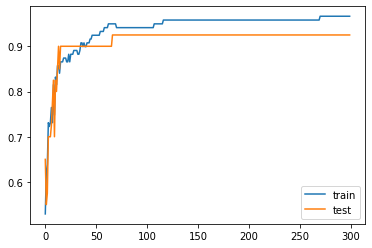

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(train_score)
plt.plot(test_score)
plt.legend(["train", "test"])
plt.show()

## 결정트리
- wine데이터 가져오기 


In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target,test_size=0.2,random_state=42
)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 모델 만들기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


훈련세트에 대한 점수가 높다 / 과대적합

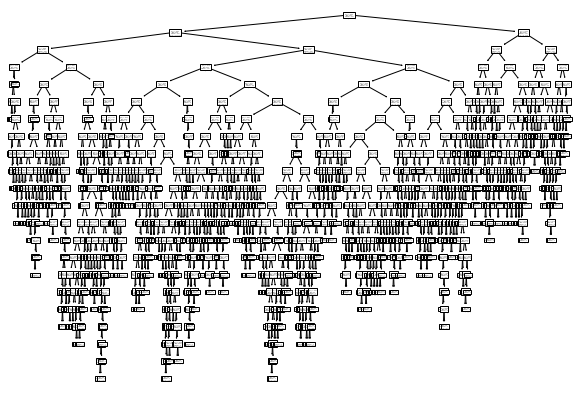

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 모델 만들기 (연습)

0.9003271117952665
0.8576923076923076


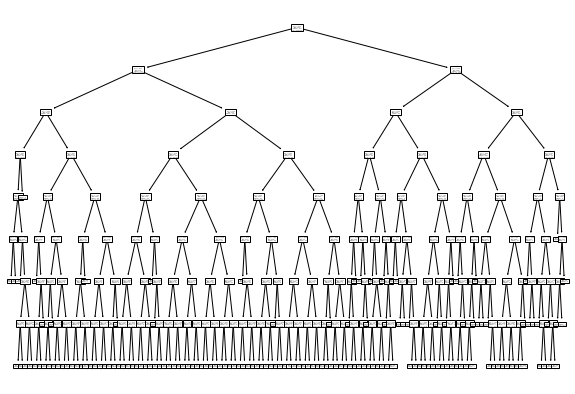

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 

dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

## 노드란 무엇인가?
- 0 이면 레드와인
- 1 이면 화이트와인

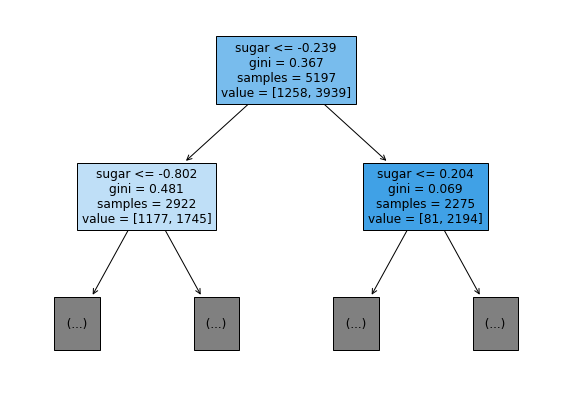

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 불순도
 + 비율
 + 레드와인 5:5 화이트와인 (균등하게 섞여 있을때 0.5로 가장높다)
 + 한 범주 안에서 서로 다른 데이터가 얼마나 섞여 있는지를 나타냄
  + 흰색과 검은색이 각각 50개 섞여있다
   + 불순도 최대 0.5
  + 흰색과 검은색이 완전 100% 분리가 됨
   + 흰색 노드 불순도 최소 0
   + 검은색 노드 불순도 최소 0 

- 엔트로피(Entropy)
 +불확실한 정도를 의미한다 (0-1사이)
 + 흰색과 검은색이 각각 50개 섞여있다
  + 엔트로피 최대 1
 + 흰색과 검은색이 완전 100%분리됨
  + 흰색노드 엔트로피 최소0
  + 검은색노드 엔트로피 최소0

0.7579372715027901
0.7376923076923076


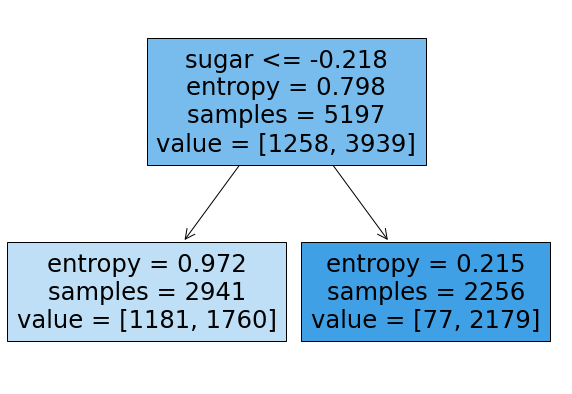

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

## 특성 중요도
- 어떤 특성이 결정트리 모델에 영향을 주었는가?

In [ ]:
print(dt.feature_importances_) #feature_importances_ : 인과관계와는 관계가 없다, 인과관계는 P-Value로 확인한다

[0.15533444 0.6675247  0.17714086]


## 현업에서의 적용
- 현업에서 DescisionTreeClassifier(1970년대)
- 랜던포레스트, XGboost pamameters, 하이퍼파라미터 매우 많음


p242
## 검증 세트
- 훈련세트와 테스트세트
- 훈련: 교과서 공부하는 것 훈련세트, 모의평가
- 검증: 강남대성 모의고사
- 테스트: 6월 / 9월
- 실전: 수능

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
# 훈련 80%
# 테스트 20%
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target,test_size=0.2,random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [ ]:
# 훈련80% 
# 검증 20%
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target,test_size=0.2,random_state=42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

- 모형 만들기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print("훈련성과",dt.score(sub_input, sub_target))
print("검증성과",dt.score(val_input, val_target))
print("마지막최종",dt.score(test_input, test_target))

훈련성과 0.9971133028626413
검증성과 0.864423076923077
마지막최종 0.8569230769230769


## 교차검증
- 데이터셋을 반복 분할
- For loop
- 샘플링 편향적일 수 있음
- 교차검증을 한다고 해서, 정확도가 무조건 올라간다?(x)
- 모형을 안정적으로 만들어 준다
 + 과대 적합 방지 

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

df = np.array([1,2,3,4,5,6,7,8,9,10])

# 데이터를 K폴드로 나눈다
folds = KFold(n_splits=5, shuffle=True)
for train_idx, valid_idx in folds.split(df):
  print(f'훈련데이터:{df[train_idx]},검증데이터:{df[valid_idx]}')

훈련데이터:[ 2  3  5  6  7  8  9 10],검증데이터:[1 4]
훈련데이터:[ 1  2  4  5  6  8  9 10],검증데이터:[3 7]
훈련데이터:[ 1  2  3  4  6  7  9 10],검증데이터:[5 8]
훈련데이터:[ 1  2  3  4  5  7  8 10],검증데이터:[6 9]
훈련데이터:[1 3 4 5 6 7 8 9],검증데이터:[ 2 10]


- 교차검증 함수

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print("평균", np.mean(scores['test_score']))

{'fit_time': array([0.01242208, 0.0106051 , 0.01989627, 0.01051641, 0.01058054]), 'score_time': array([0.00130367, 0.00125098, 0.0013361 , 0.00134611, 0.00127673]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 0.855300214703487


- StratifiedKFold 사용 (이것까지 들어가면 좋은 코드)
- 참조할만한 좋은 코드를 찾는 것도 실력

In [ ]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(scores)
print("평균:", np.mean(scores['test_score']))

{'fit_time': array([0.0142889 , 0.01287746, 0.01375127, 0.01249719, 0.01662874,
       0.01322246, 0.01277661, 0.01421905, 0.0130713 , 0.01299787]), 'score_time': array([0.00124955, 0.00112534, 0.0013597 , 0.00117397, 0.00105834,
       0.00120282, 0.0014286 , 0.00127149, 0.00107288, 0.00111914]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
평균: 0.8574181117533719


## 하이퍼 파라미터 튜닝
- 그리드 서치 (용어기억)
 + 사람이 수동적으로 입력
 + Max_Depth:[1,3,7]
- 랜덤 서치 (용어기억)
 + 사람이 범위만 지정
 + Max_Depth: 1-10 / by random 
- 베이지안 옵티마이제이션
- 사람의 개입 없이 하이퍼 파라미터 튜닝을 자동으로 수행하는 기술을 AutoML이라고 한다 
 + 예)PyCaret
- 각 모델마다 적게는 1-2개에서 , 많게는 5-6개의 매개변수를 제공한다
 + XGBoost 100개....?
- 하이퍼파라미터와 동시에 교차검증을 수행
 + 미친짓

교차검증 5번
교차검증 1회 실행시 Max Depth 3번 적용
- 총 결괏값 3 X 5 나온다

- Max Depth = 1,3,7
- Criterion = gini, entropy



In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
          'max_depth':range(5,20,1),
          'min_samples_split':range(2,100,10)} 

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731
